In [3]:
#import librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error, mean_absolute_percentage_error, 
    mean_squared_error, r2_score
)

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [5]:
#load dataset
df = pd.read_csv('mumbai_house_data.csv')
df.head()

,bhk,type,locality,area,price,price_unit,region,status,age,expected_roi(%),demand_indicator,market_volatitlity_score,property_liquidity_index
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New,10.35,7.9,6.3,10.0
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New,9.25,7.8,7.4,10.0
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New,8.90,8.5,4.9,9.0
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New,9.96,6.1,3.4,8.9
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New,8.08,8.3,4.4,8.1


In [7]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bhk                       76038 non-null  int64  
 1   type                      76038 non-null  object 
 2   locality                  76038 non-null  object 
 3   area                      76038 non-null  int64  
 4   price                     76038 non-null  float64
 5   price_unit                76038 non-null  object 
 6   region                    76038 non-null  object 
 7   status                    76038 non-null  object 
 8   age                       76038 non-null  object 
 9   expected_roi(%)           76038 non-null  float64
 10  demand_indicator          76038 non-null  float64
 11  market_volatitlity_score  76038 non-null  float64
 12  property_liquidity_index  76038 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 7.5+ MB


In [9]:
#dataset description
df.describe()

,bhk,area,price,expected_roi(%),demand_indicator,market_volatitlity_score,property_liquidity_index
count,76038.000000,76038.000000,76038.00000,76038.000000,76038.000000,76038.000000,76038.000000
mean,2.015111,1024.536850,29.38227,9.610755,7.986348,5.505142,9.297357
std,0.922754,670.276165,32.90345,1.520605,0.977044,1.205593,0.749425
min,1.000000,127.000000,1.00000,3.310000,3.500000,1.000000,4.800000
25%,1.000000,640.000000,1.75000,8.580000,7.300000,4.700000,8.800000
50%,2.000000,872.000000,5.50000,9.610000,8.000000,5.500000,9.500000
75%,3.000000,1179.000000,59.00000,10.630000,8.700000,6.300000,10.000000
max,10.000000,16000.000000,99.99000,15.000000,10.000000,10.000000,10.000000


In [11]:
#dataset description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bhk,76038.0,2.015111,0.922754,1.00,1.00,2.00,3.00,10.00
area,76038.0,1024.536850,670.276165,127.00,640.00,872.00,1179.00,16000.00
price,76038.0,29.382270,32.903450,1.00,1.75,5.50,59.00,99.99
expected_roi(%),76038.0,9.610755,1.520605,3.31,8.58,9.61,10.63,15.00
demand_indicator,76038.0,7.986348,0.977044,3.50,7.30,8.00,8.70,10.00
market_volatitlity_score,76038.0,5.505142,1.205593,1.00,4.70,5.50,6.30,10.00
property_liquidity_index,76038.0,9.297357,0.749425,4.80,8.80,9.50,10.00,10.00


In [13]:
#dataset size
df.size

988494

In [15]:
#dataset shape
df.shape

(76038, 13)

# Data Cleaning

In [61]:
#checking for null values
df.isnull().sum()

bhk                         0
type                        0
locality                    0
area                        0
price                       0
price_unit                  0
region                      0
status                      0
age                         0
expected_roi(%)             0
demand_indicator            0
market_volatitlity_score    0
property_liquidity_index    0
dtype: int64

In [19]:
#checking for duplicated values
df.duplicated().sum()

0

In [66]:
#Convert Price Units to Lakhs
# E.g., 2.5 Cr => 250 Lakhs
df['price'] = np.where(
    df['price_unit'].str.lower().str.contains('cr'),
    df['price'] * 100,
    df['price']
)

# Data Exploration & Summarization

In [68]:
#region by price 
region_price = df.groupby('region')['price'].mean().reset_index().sort_values(by='price', ascending=False)
print(region_price)

              region          price
106     Malabar Hill  275000.000000
143      Peddar Road  206250.000000
128   Napeansea Road  177000.000000
13    Babulnath Road  142666.666667
222            Worli  107204.414977
..               ...            ...
49   Dombivli (West)      16.333333
199           Umroli      15.077600
211           Vevoor      14.000000
210          Versova      12.500000
92         Khatiwali       9.000000

[228 rows x 2 columns]


In [25]:
#count of property by region
crosstab_region_status = pd.crosstab(df['region'], df['status'])
print(crosstab_region_status)

status                   Ready to move  Under Construction
region                                                    
Adaigaon                             1                   0
Agripada                            56                   5
Airoli                             240                  53
Ambarnath                           25                   1
Ambernath East                     355                 265
...                                ...                 ...
kandivali                            2                   0
kasaradavali thane west              9                   0
mumbai                               0                   1
sector                               1                   0
vile parle west                      1                   0

[228 rows x 2 columns]


In [27]:
#house with more than 3 bhk and price greater than 100 lakhs
print("Houses with BHK > 3 and price > 100 Lakhs:\n", df.query("bhk > 3 and price > 100"))

Houses with BHK > 3 and price > 100 Lakhs:
        bhk       type                                locality  area   price  \
6        5      Villa                          Agami Estancia  2921   199.0   
32       4  Apartment                  Ravechi Shreeji Divine  1874   270.0   
55       5      Villa                          Agami Estancia  2921   199.0   
83       4  Apartment  Shree Krupa Nandanvan Homes Building B  1300   254.0   
209      4  Apartment                Aurum Q Island R4 AND R5  1492   340.0   
...    ...        ...                                     ...   ...     ...   
75982    4  Apartment                      Kalpataru Parkcity  1686   360.0   
75998    4  Apartment                      Kalpataru Parkcity  1210   256.0   
76034    5  Apartment                       Parinee Liva Roca  3049  1200.0   
76035    4  Apartment                           Lodha Seaview  3313  1000.0   
76037    5  Apartment                Sunteck Signature Island  5200  2500.0   

      p

In [29]:
print("Houses with area between 500 and 1000 sqft:\n", df.query("area >= 500 and area <= 1000"))

Houses with area between 500 and 1000 sqft:
        bhk       type                                  locality  area   price  \
0        3  Apartment       Lak And Hanware The Residency Tower   685  250.00   
1        2  Apartment         Radheya Sai Enclave Building No 2   640   52.51   
2        2  Apartment                             Romell Serene   610  173.00   
3        2  Apartment      Soundlines Codename Urban Rainforest   876   59.98   
4        2  Apartment                             Origin Oriana   659   94.11   
...    ...        ...                                       ...   ...     ...   
76025    2  Apartment  NARANG REALTY And WADHWA GROUP Courtyard   762  177.00   
76026    2  Apartment  NARANG REALTY And WADHWA GROUP Courtyard   519  120.00   
76028    2  Apartment                         Dosti West County   639   87.47   
76029    2  Apartment                         Dosti West County   550   75.26   
76032    1  Apartment                         Parinee Liva Roca 

In [31]:
#mean,median and,count by region
print("Mean, Median, Count by Region:")
print(df.groupby('region')['price'].agg(['mean','median','count']).sort_values(by='mean', ascending=False))
print("Price stats by BHK:")
print(df.groupby('bhk')['price'].agg(['min','max','mean','count']))

Mean, Median, Count by Region:
                        mean   median  count
region                                      
Malabar Hill     2750.000000  2750.00      2
Peddar Road      2062.500000  1950.00      4
Napeansea Road   1770.000000  1500.00     19
Babulnath Road   1426.666667  1140.00      3
Worli            1072.346484   760.00    219
...                      ...      ...    ...
Dombivli (West)    16.333333    15.00      3
Umroli             15.077600    14.62     25
Vevoor             14.000000    14.00      1
Versova            12.500000    12.50      1
Khatiwali           9.000000     9.00      1

[228 rows x 3 columns]
Price stats by BHK:
         min     max         mean  count
bhk                                     
1       4.49  1207.0    62.770593  24613
2       6.50  1869.0   132.395652  31429
3      23.40  5555.0   270.441158  15273
4      39.00  3600.0   535.332483   3934
5      90.00  6000.0  1034.264026    606
6     110.00  4000.0  1024.831081    148
7     450.00

In [37]:
#bhk vs property status
print("Cross-tab of BHK vs Status:")
print(pd.crosstab(df['bhk'], df['status']))

Cross-tab of BHK vs Status:
status  Ready to move  Under Construction
bhk                                      
1               13306               11307
2               17885               13544
3               10099                5174
4                3048                 886
5                 493                 113
6                 124                  24
7                   9                   7
8                   7                   1
9                   5                   0
10                  6                   0


In [39]:
#region by bhk
print("Cross-tab of Region vs BHK:")
print(pd.crosstab(df['region'], df['bhk']))

Cross-tab of Region vs BHK:
bhk                       1    2   3   4   5   6   7   8   9   10
region                                                           
Adaigaon                   1    0   0   0   0   0   0   0   0   0
Agripada                   8   23  22   8   0   0   0   0   0   0
Airoli                   127  123  38   5   0   0   0   0   0   0
Ambarnath                 10   16   0   0   0   0   0   0   0   0
Ambernath East           394  213  11   2   0   0   0   0   0   0
...                      ...  ...  ..  ..  ..  ..  ..  ..  ..  ..
kandivali                  0    1   1   0   0   0   0   0   0   0
kasaradavali thane west    6    3   0   0   0   0   0   0   0   0
mumbai                     1    0   0   0   0   0   0   0   0   0
sector                     0    0   1   0   0   0   0   0   0   0
vile parle west            0    1   0   0   0   0   0   0   0   0

[228 rows x 10 columns]


In [41]:
#mean price by region & status
print("Pivot: Mean Price by Region & Status:")
print(pd.pivot_table(df, values='price', index='region', columns='status', aggfunc='mean'))

Pivot: Mean Price by Region & Status:
status                   Ready to move  Under Construction
region                                                    
Adaigaon                     35.000000                 NaN
Agripada                    565.767857          398.800000
Airoli                      116.604750          168.988679
Ambarnath                    30.130400           32.000000
Ambernath East               33.288535           35.012226
...                                ...                 ...
kandivali                   307.500000                 NaN
kasaradavali thane west      63.387778                 NaN
mumbai                             NaN           29.990000
sector                      150.000000                 NaN
vile parle west             105.000000                 NaN

[228 rows x 2 columns]


In [45]:
#count by bhk & status
print("Pivot: Count by BHK & Status:")
print(pd.pivot_table(df, values='price', index='bhk', columns='status', aggfunc='count'))

Pivot: Count by BHK & Status:
status  Ready to move  Under Construction
bhk                                      
1             13306.0             11307.0
2             17885.0             13544.0
3             10099.0              5174.0
4              3048.0               886.0
5               493.0               113.0
6               124.0                24.0
7                 9.0                 7.0
8                 7.0                 1.0
9                 5.0                 NaN
10                6.0                 NaN


# Exploratory Data Analysis

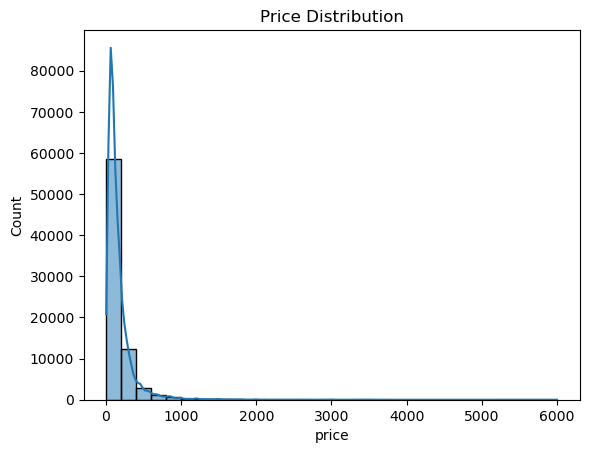

In [47]:
#price distribution
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Price Distribution')
plt.show()

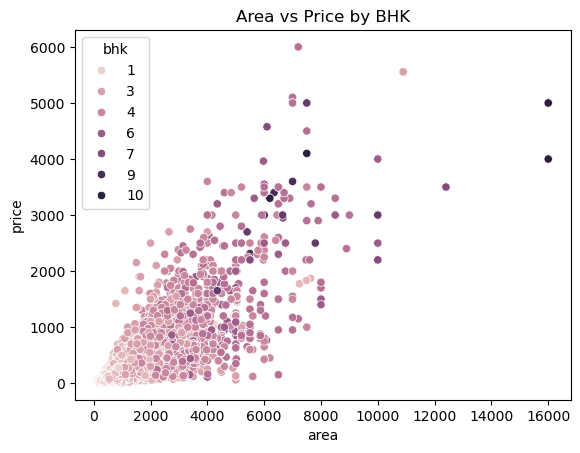

In [49]:
#area vs price by bhk
sns.scatterplot(data=df, x='area', y='price', hue='bhk')
plt.title('Area vs Price by BHK')
plt.show()

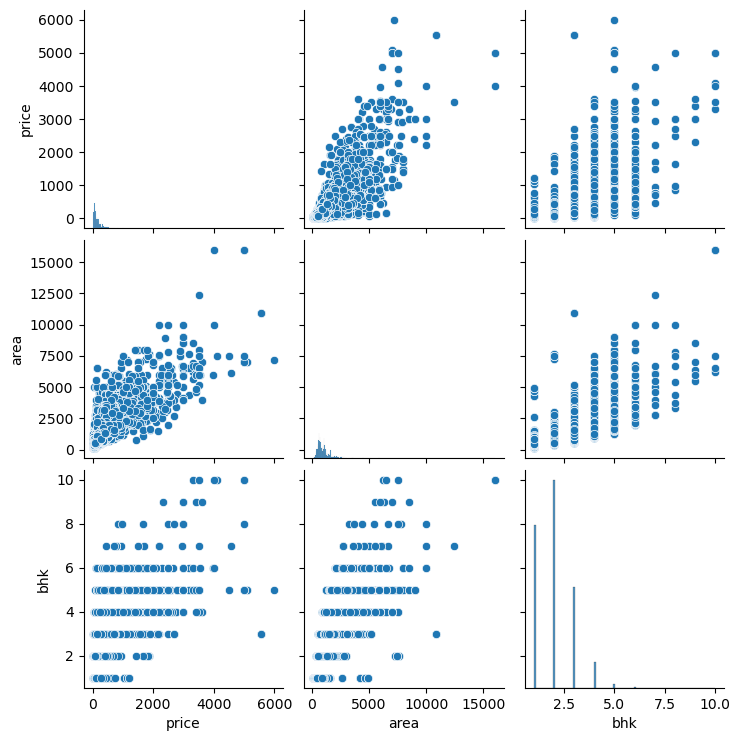

In [51]:
#price vs area vs bhk
sns.pairplot(df[['price', 'area', 'bhk']])
plt.show()

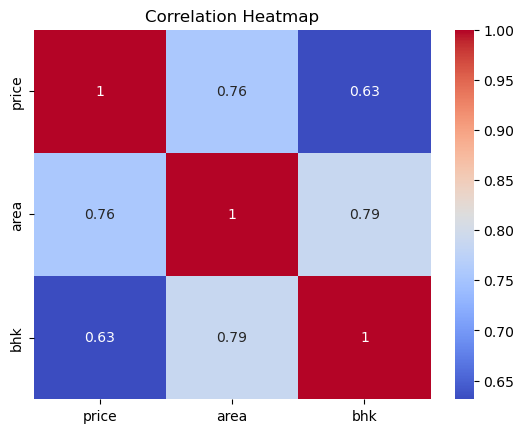

In [53]:
#correlation of price,area and bhk
sns.heatmap(df[['price', 'area', 'bhk']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

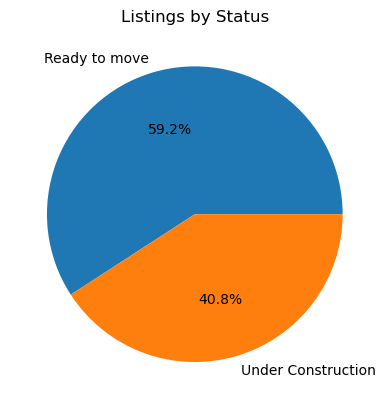

In [55]:
#property distribution
status_counts = df['status'].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%')
plt.title('Listings by Status')
plt.show()

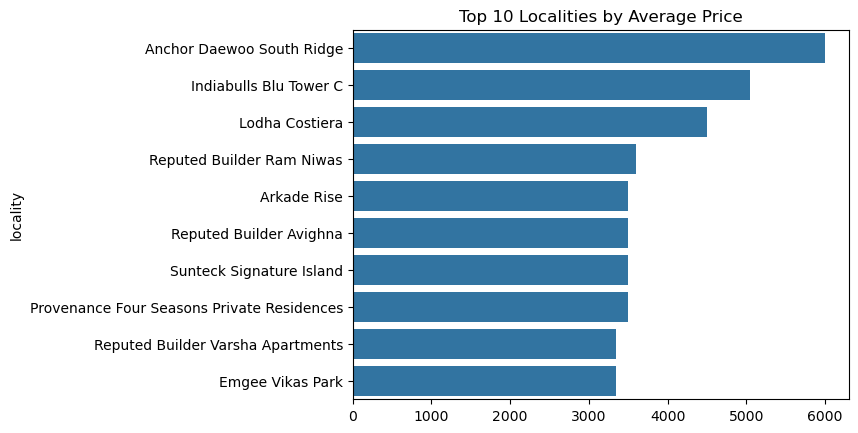

In [57]:
#top 10 loaclities by average price
top_localities = df.groupby('locality')['price'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_localities.values, y=top_localities.index)
plt.title('Top 10 Localities by Average Price')
plt.show()

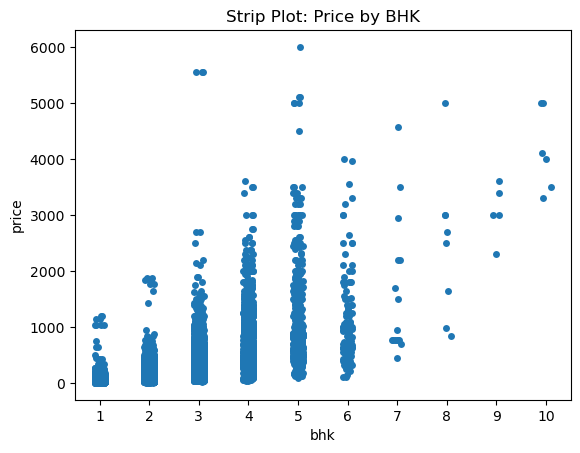

In [59]:
#price by bhk
sns.stripplot(x='bhk', y='price', data=df, jitter=True)
plt.title('Strip Plot: Price by BHK')
plt.show()

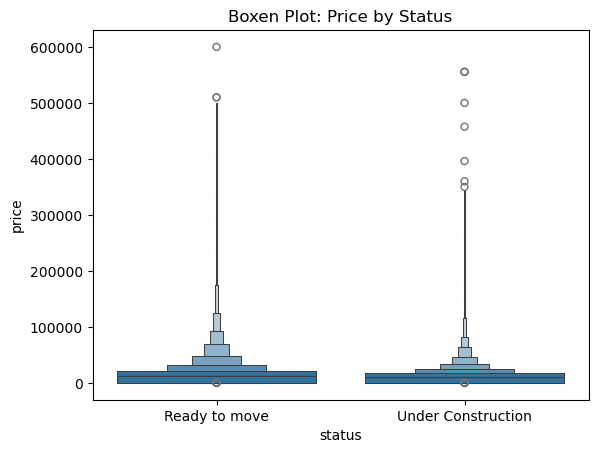

In [71]:
#price by status
sns.boxenplot(x='status', y='price', data=df)
plt.title('Boxen Plot: Price by Status')
plt.show()

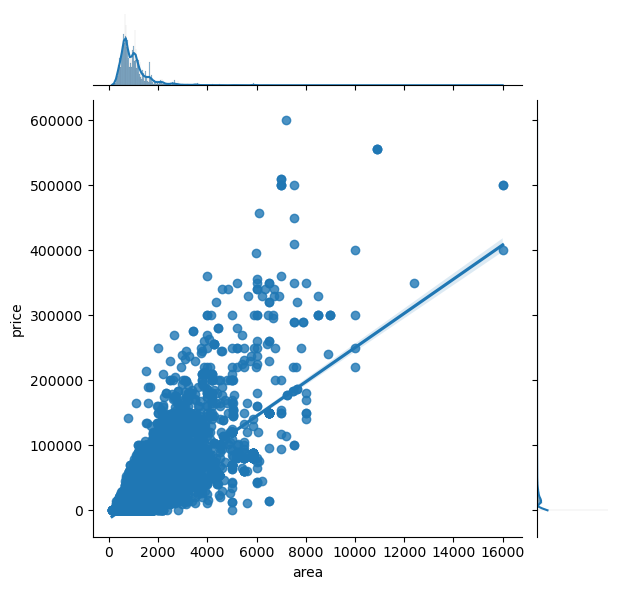

In [73]:
#area vs price
sns.jointplot(x='area', y='price', data=df, kind='reg')
plt.show()

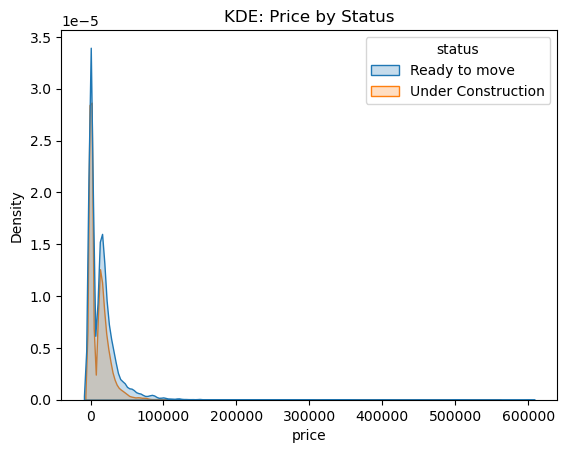

In [75]:
#distribution of status
sns.kdeplot(data=df, x='price', hue='status', fill=True)
plt.title('KDE: Price by Status')
plt.show()

# Regression

In [13]:
#Drop Unused Columns
drop_cols = [
    'price_unit',               # We merged this into 'price'
    'expected_roi(%)',
    'demand_indicator',
    'market_volatitlity_score',
    'property_liquidity_index'
]
df = df.drop(columns=drop_cols, errors='ignore')

print("\n Columns after cleaning:", df.columns.tolist())


 Columns after cleaning: ['bhk', 'type', 'locality', 'area', 'price', 'region', 'status', 'age']


In [14]:
# Separate features and target
X = df[['bhk', 'type', 'locality', 'area', 'region', 'status']]
y = df['price']

print("\n Final Features:", X.columns.tolist())
print(" Target:", y.name)


 Final Features: ['bhk', 'type', 'locality', 'area', 'region', 'status']
 Target: price


In [15]:
# Preprocessing Pipeline
num_cols = ['bhk', 'area']
cat_cols = ['type', 'locality', 'region', 'status']

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

In [16]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Regressors
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(max_depth=10),
    "Random Forest": RandomForestRegressor(n_estimators=50, max_depth=10, n_jobs=-1),
    "Gradient Boost": GradientBoostingRegressor(n_estimators=50, max_depth=5),
    "XGBoost": XGBRegressor(n_estimators=50, max_depth=5, verbosity=0, n_jobs=-1)
}

In [18]:
#Train & Evaluate
metrics = []
for name, model in models.items():
    pipe = Pipeline([
        ("prep", preprocessor),
        ("reg", model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    metrics.append({
        "Model": name,
        "MAE": mean_absolute_error(y_test, y_pred),
        "MAPE": mean_absolute_percentage_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2": r2_score(y_test, y_pred)
    })

results_df = pd.DataFrame(metrics)
print("\n=== Test Set Results ===")
print(results_df)



=== Test Set Results ===
            Model        MAE      MAPE           MSE        RMSE        R2
0          Linear  34.355478  0.295807   6486.082285   80.536217  0.858070
1           Ridge  36.350507  0.317299   6306.338314   79.412457  0.862003
2           Lasso  68.443976  0.633967  16323.655021  127.764060  0.642801
3   Decision Tree  48.203859  0.398794   9506.593484   97.501761  0.791974
4   Random Forest  47.198672  0.408428   8851.550315   94.082678  0.806308
5  Gradient Boost  46.872249  0.434896   7254.684054   85.174433  0.841251
6         XGBoost  37.750976  0.311714   5924.292915   76.969428  0.870363


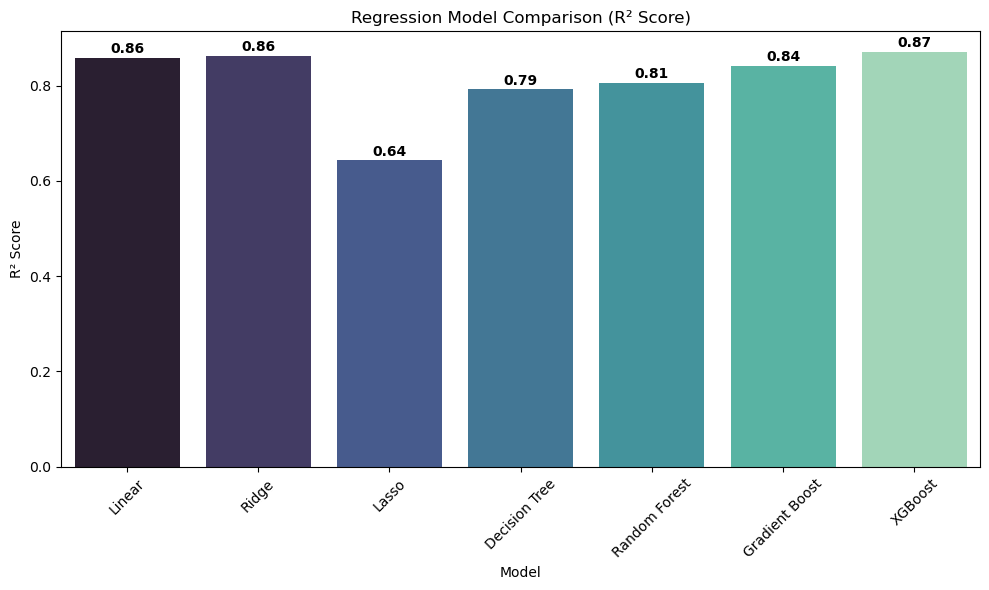

In [19]:
# Barplot of R²
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Model", y="R2", palette="mako")
for i, row in results_df.iterrows():
    plt.text(i, row["R2"] + 0.01, f"{row['R2']:.2f}", ha='center', fontweight='bold')
plt.title("Regression Model Comparison (R² Score)")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [20]:
# Cross-validation R² for each Model
print("\n=== Cross-Validation R² (5-fold) ===")
for name, model in models.items():
    pipe = Pipeline([
        ("prep", preprocessor),
        ("reg", model)
    ])
    cv_scores = cross_val_score(pipe, X, y, cv=5, scoring='r2', n_jobs=-1)
    print(f"{name}: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")


=== Cross-Validation R² (5-fold) ===
Linear: 0.795 ± 0.026
Ridge: 0.809 ± 0.026
Lasso: 0.615 ± 0.028
Decision Tree: 0.720 ± 0.030
Random Forest: 0.749 ± 0.032
Gradient Boost: 0.784 ± 0.027
XGBoost: 0.817 ± 0.039


In [21]:
#Hyperparameter Tuning (XGBoost)
param_grid = {
    'reg__n_estimators': [50, 100, 200],
    'reg__max_depth': [3, 5, 7]
}

grid = GridSearchCV(
    Pipeline([
        ("prep", preprocessor),
        ("reg", XGBRegressor(verbosity=0, n_jobs=-1))
    ]),
    param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("\n=== Best XGBoost Parameters ===")
print(grid.best_params_)
print(f"Best CV R²: {grid.best_score_:.3f}")


=== Best XGBoost Parameters ===
{'reg__max_depth': 7, 'reg__n_estimators': 200}
Best CV R²: 0.885


In [22]:
#Final XGBoost Model with Best Params
best_xgb = Pipeline([
    ("prep", preprocessor),
    ("reg", XGBRegressor(max_depth=grid.best_params_['reg__max_depth'],
                         n_estimators=grid.best_params_['reg__n_estimators'],
                         verbosity=0, n_jobs=-1))
])
best_xgb.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['bhk', 'area']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['type', 'locality', 'region',
                                                   'status'])])),
                ('reg',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=N...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=7, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=-1,
                              num_parallel_tree=None, random_state=None, ...))])

In [23]:
#Final Test Evaluation
y_pred = best_xgb.predict(X_test)
print("\n Final Test R²:", r2_score(y_test, y_pred))


 Final Test R²: 0.9057085005497663


In [24]:
#Save Model
import joblib

joblib.dump(best_xgb, "final_xgb_pipeline.pkl")
print("\n Saved as final_xgb_pipeline.pkl")


 Saved as final_xgb_pipeline.pkl


In [25]:
# Ready for Deployment
print("\n To predict for new data, pass:")
print(X_test.head(1))
print("\n The prediction is always in Lakhs \n")


 To predict for new data, pass:
       bhk       type           locality  area  region              status
44465    1  Apartment  Mahaavir MAHAGHAR   650  Taloja  Under Construction

 The prediction is always in Lakhs 



# Clustering

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.mixture import GaussianMixture

import warnings
warnings.filterwarnings("ignore")

In [82]:
#liad dataset
df = pd.read_csv("mumbai_house_data.csv")
df.head()

,bhk,type,locality,area,price,price_unit,region,status,age,expected_roi(%),demand_indicator,market_volatitlity_score,property_liquidity_index
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New,10.35,7.9,6.3,10.0
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New,9.25,7.8,7.4,10.0
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New,8.90,8.5,4.9,9.0
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New,9.96,6.1,3.4,8.9
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New,8.08,8.3,4.4,8.1


In [84]:
#Convert price to lakhs
def convert_price(x):
    if x < 10:
        crore_part = int(x)
        decimal_part = x - crore_part
        price_in_lakhs = crore_part * 100 + round(decimal_part * 100)
        return price_in_lakhs
    else:
        return x

df['price_lakhs'] = df['price'].apply(convert_price)

print("\nAfter conversion:")
print(df[['price', 'price_lakhs']].head(10))


After conversion:
   price  price_lakhs
0   2.50       250.00
1  52.51        52.51
2   1.73       173.00
3  59.98        59.98
4  94.11        94.11
5   3.30       330.00
6   1.99       199.00
7   2.89       289.00
8  29.84        29.84
9   2.72       272.00


In [86]:
#scale price
scaler = StandardScaler()
df['price_scaled'] = scaler.fit_transform(df[['price_lakhs']])

In [88]:
#Minibatch kmeans
mbkmeans = MiniBatchKMeans(n_clusters=3, random_state=42, batch_size=1000)
df['MiniBatchKMeans_Cluster'] = mbkmeans.fit_predict(df[['price_scaled']])

In [90]:
#gausssian mixture
gmm = GaussianMixture(n_components=3, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(df[['price_scaled']])

In [92]:
#Interpret clusters
kmeans_means = df.groupby('MiniBatchKMeans_Cluster')['price_lakhs'].mean().sort_values()
gmm_means = df.groupby('GMM_Cluster')['price_lakhs'].mean().sort_values()

print("\nMiniBatch KMeans cluster means (in lakhs):\n", kmeans_means)
print("\nGMM cluster means (in lakhs):\n", gmm_means)


MiniBatch KMeans cluster means (in lakhs):
 MiniBatchKMeans_Cluster
2     75.900787
0    226.056793
1    571.498438
Name: price_lakhs, dtype: float64

GMM cluster means (in lakhs):
 GMM_Cluster
2     73.409171
0    215.903425
1    548.911916
Name: price_lakhs, dtype: float64


In [94]:
# Map numeric cluster -> human labels
kmeans_order = {k: v for v, k in enumerate(kmeans_means.index)}
gmm_order = {k: v for v, k in enumerate(gmm_means.index)}

df['MiniBatchKMeans_Label'] = df['MiniBatchKMeans_Cluster'].map(kmeans_order)
df['GMM_Label'] = df['GMM_Cluster'].map(gmm_order)

label_map = {0: 'Low', 1: 'Medium', 2: 'High'}
df['MiniBatchKMeans_Label'] = df['MiniBatchKMeans_Label'].map(label_map)
df['GMM_Label'] = df['GMM_Label'].map(label_map)

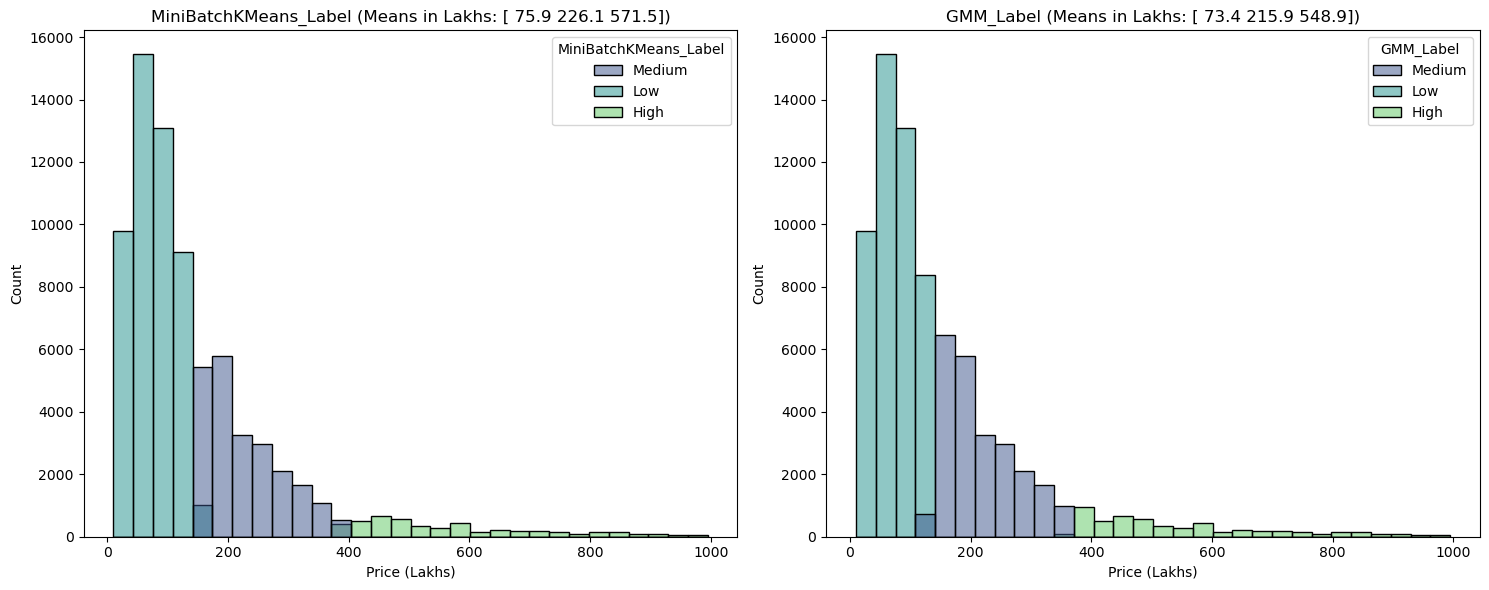

In [96]:
#Visualize
def plot_clusters(column, means, ax):
    sns.histplot(data=df, x='price_lakhs', hue=column, bins=30, palette='viridis', ax=ax)
    ax.set_title(f"{column} (Means in Lakhs: {means.values.round(1)})")
    ax.set_xlabel("Price (Lakhs)")
    ax.set_ylabel("Count")

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

plot_clusters('MiniBatchKMeans_Label', kmeans_means, axs[0])
plot_clusters('GMM_Label', gmm_means, axs[1])

plt.tight_layout()
plt.show()

In [97]:
#cluster count
print("\nCluster counts (human labels):")
print(df[['MiniBatchKMeans_Label', 'GMM_Label']].apply(pd.Series.value_counts))

#Export final data
df.to_csv("mumbai_house_data_with_clusters.csv", index=False)
print("\n Final CSV saved as: mumbai_house_data_with_clusters.csv")


Cluster counts (human labels):
        MiniBatchKMeans_Label  GMM_Label
Low                     48435      46691
Medium                  22802      23909
High                     4801       5438

 Final CSV saved as: mumbai_house_data_with_clusters.csv
